<a href="https://colab.research.google.com/github/cashby-890/ST-554-Project1/blob/main/Task2/ST_554_Project_1_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis of UCI's Air Quality Data**

As fun as diving into a dataset sounds, we need to install and import a few packages that allow us to produce numerical and graphical summaries for our variables of interest. Our ultimate goal is to observe any trends or behaviors in the benzene concentration subject to other variables like the temperature, humidity, and the sensor measurements of other pollutants in the air like carbon monoxide and ozone.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!pip install ucimlrepo

Notice that we had to install the machine learning repository from UCI, better known as `ucimlrepo`, in order to access the data set that we need. After installing the repo, we now need to import it as `uci`.

In [2]:
import ucimlrepo as uci

Next, we'll "fetch" the file that contains the air quality data set from the repo.

In [3]:
air_quality=uci.fetch_ucirepo(id=360)

To get the data itself, we'll need to use the `data.features` attribute. Here's a tiny sample of the observations from it.

In [4]:
aq_data=air_quality.data.features
aq_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


Something looks strange; let's check to see if everything was read in appropriately.

In [5]:
aq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


I noticed a fishy number in there, even though it pertains to a variable that's not of interest in this stage. Let's get some quick summary stats to see if anything has gone awry.

In [6]:
aq_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


The minimum value for ***all*** the variables (besides the date and time) is -200, which makes no sense in this context. Let's find the entries where the benzene concentration is -200 and remove them from the data set.

In [7]:
aq_cleaned_data=aq_data.loc[aq_data['C6H6(GT)']!=-200]
aq_cleaned_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139


Before going any further, let's go ahead and drop the other `(GT)` columns that do not pertain to the true benzene concentration.

In [8]:
aq_cleaned_relevant_data=aq_cleaned_data.drop(['Date','Time','CO(GT)','NMHC(GT)','NOx(GT)','NO2(GT)'],axis=1)
aq_cleaned_relevant_data

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,1360,11.9,1046,1056,1692,1268,13.6,48.9,0.7578
1,1292,9.4,955,1174,1559,972,13.3,47.7,0.7255
2,1402,9.0,939,1140,1555,1074,11.9,54.0,0.7502
3,1376,9.2,948,1092,1584,1203,11.0,60.0,0.7867
4,1272,6.5,836,1205,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...
9352,1314,13.5,1101,539,1374,1729,21.9,29.3,0.7568
9353,1163,11.4,1027,604,1264,1269,24.3,23.7,0.7119
9354,1142,12.4,1063,603,1241,1092,26.9,18.3,0.6406
9355,1003,9.5,961,702,1041,770,28.3,13.5,0.5139


Now, let's rerun our quick summary stats to see what improvements have been made.

In [9]:
aq_cleaned_relevant_data.describe()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,1099.833166,10.083105,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,217.080037,7.449820,266.831429,256.817320,346.206794,398.484288,8.832116,17.316892,0.403813
min,647.000000,0.100000,383.000000,322.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,937.000000,4.400000,734.500000,658.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1063.000000,8.200000,909.000000,806.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,1231.000000,14.000000,1116.000000,969.500000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,2040.000000,63.700000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


That's better!

Below are the histograms pertaining to the benzene concentration, sensor, and
weather variables. Most of these graphs not involving any of the weather variables have a particular pattern in common. They all use 40 bins.

Histogram for True Benzene Concentration

(array([4.180e+02, 1.033e+03, 1.045e+03, 1.001e+03, 9.050e+02, 8.010e+02,
        6.730e+02, 5.200e+02, 5.020e+02, 4.050e+02, 3.360e+02, 2.670e+02,
        2.390e+02, 2.110e+02, 1.270e+02, 1.230e+02, 9.900e+01, 6.600e+01,
        5.000e+01, 3.900e+01, 2.800e+01, 1.900e+01, 2.700e+01, 1.800e+01,
        6.000e+00, 7.000e+00, 4.000e+00, 5.000e+00, 6.000e+00, 3.000e+00,
        1.000e+00, 5.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.1 ,  1.69,  3.28,  4.87,  6.46,  8.05,  9.64, 11.23, 12.82,
        14.41, 16.  , 17.59, 19.18, 20.77, 22.36, 23.95, 25.54, 27.13,
        28.72, 30.31, 31.9 , 33.49, 35.08, 36.67, 38.26, 39.85, 41.44,
        43.03, 44.62, 46.21, 47.8 , 49.39, 50.98, 52.57, 54.16, 55.75,
        57.34, 58.93, 60.52, 62.11, 63.7 ]),
 <BarContainer object of 40 artists>)

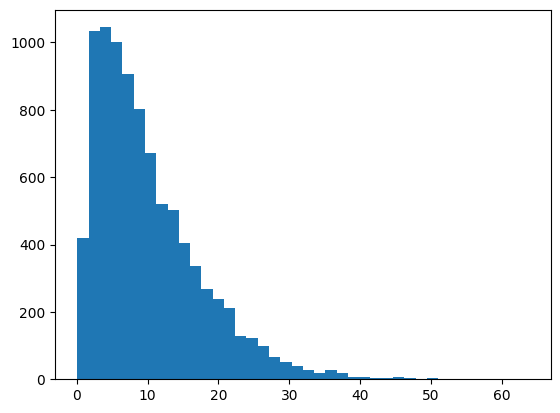

In [10]:
plt.hist(aq_cleaned_relevant_data['C6H6(GT)'],bins=40)

Histogram for Sensor Measurement of Carbon Monoxide Concentration

(array([ 11.,  36.,  69., 153., 284., 403., 531., 565., 593., 664., 622.,
        582., 572., 529., 455., 395., 363., 300., 294., 270., 210., 200.,
        177., 160., 141., 105.,  77.,  60.,  37.,  30.,  29.,  21.,  13.,
         14.,   7.,   7.,   5.,   2.,   3.,   2.]),
 array([ 647.   ,  681.825,  716.65 ,  751.475,  786.3  ,  821.125,
         855.95 ,  890.775,  925.6  ,  960.425,  995.25 , 1030.075,
        1064.9  , 1099.725, 1134.55 , 1169.375, 1204.2  , 1239.025,
        1273.85 , 1308.675, 1343.5  , 1378.325, 1413.15 , 1447.975,
        1482.8  , 1517.625, 1552.45 , 1587.275, 1622.1  , 1656.925,
        1691.75 , 1726.575, 1761.4  , 1796.225, 1831.05 , 1865.875,
        1900.7  , 1935.525, 1970.35 , 2005.175, 2040.   ]),
 <BarContainer object of 40 artists>)

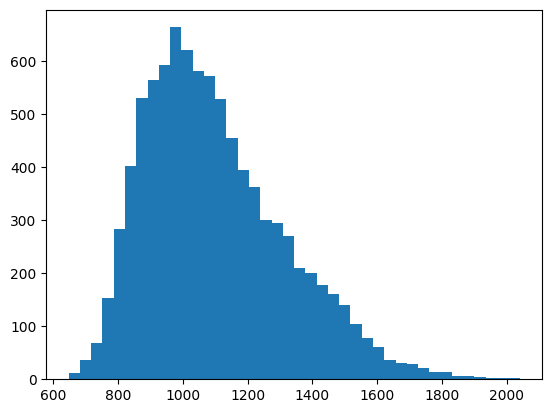

In [11]:
plt.hist(aq_cleaned_relevant_data['PT08.S1(CO)'],bins=40)

Histogram of Sensor Measurement of Non-Metanic Hydrocarbon Concentration

(array([ 28.,  82., 130., 237., 353., 517., 531., 544., 576., 595., 616.,
        601., 551., 515., 437., 422., 432., 341., 288., 257., 232., 170.,
        133., 111.,  82.,  61.,  41.,  24.,  32.,  19.,   7.,   5.,  10.,
          4.,   5.,   1.,   0.,   0.,   0.,   1.]),
 array([ 383.   ,  428.775,  474.55 ,  520.325,  566.1  ,  611.875,
         657.65 ,  703.425,  749.2  ,  794.975,  840.75 ,  886.525,
         932.3  ,  978.075, 1023.85 , 1069.625, 1115.4  , 1161.175,
        1206.95 , 1252.725, 1298.5  , 1344.275, 1390.05 , 1435.825,
        1481.6  , 1527.375, 1573.15 , 1618.925, 1664.7  , 1710.475,
        1756.25 , 1802.025, 1847.8  , 1893.575, 1939.35 , 1985.125,
        2030.9  , 2076.675, 2122.45 , 2168.225, 2214.   ]),
 <BarContainer object of 40 artists>)

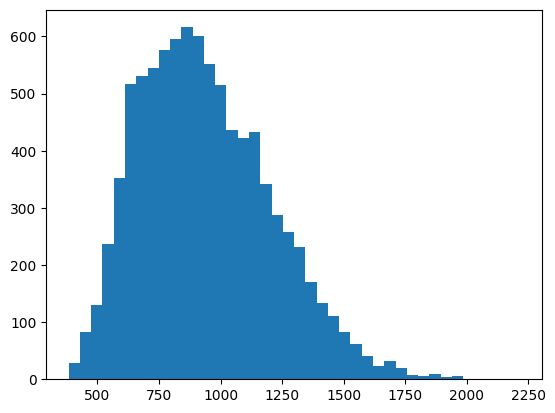

In [12]:
plt.hist(aq_cleaned_relevant_data['PT08.S2(NMHC)'],bins=40)

Histogram of Sensor Measurement for Concentration of Nitrogen Oxides

(array([ 51., 155., 377., 531., 592., 780., 901., 931., 930., 851., 662.,
        521., 439., 341., 234., 183., 140.,  74.,  62.,  70.,  34.,  29.,
         19.,  22.,  18.,  10.,   6.,  10.,   2.,   6.,   3.,   0.,   0.,
          3.,   1.,   0.,   0.,   2.,   0.,   1.]),
 array([ 322.   ,  381.025,  440.05 ,  499.075,  558.1  ,  617.125,
         676.15 ,  735.175,  794.2  ,  853.225,  912.25 ,  971.275,
        1030.3  , 1089.325, 1148.35 , 1207.375, 1266.4  , 1325.425,
        1384.45 , 1443.475, 1502.5  , 1561.525, 1620.55 , 1679.575,
        1738.6  , 1797.625, 1856.65 , 1915.675, 1974.7  , 2033.725,
        2092.75 , 2151.775, 2210.8  , 2269.825, 2328.85 , 2387.875,
        2446.9  , 2505.925, 2564.95 , 2623.975, 2683.   ]),
 <BarContainer object of 40 artists>)

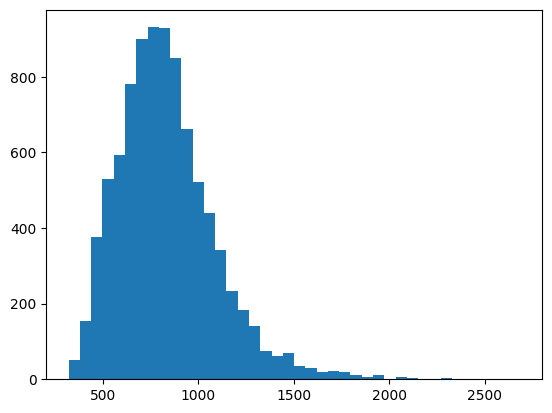

In [13]:
plt.hist(aq_cleaned_relevant_data['PT08.S3(NOx)'],bins=40)

Histogram of Sensor Measurement of Nitrogen Dioxide Concentration

(array([  7.,  10.,  31.,  80., 145., 183., 227., 262., 292., 291., 322.,
        345., 408., 549., 538., 571., 630., 638., 606., 524., 440., 397.,
        307., 248., 215., 189., 137.,  92.,  73.,  62.,  35.,  32.,  25.,
         23.,  20.,   9.,  12.,   9.,   5.,   2.]),
 array([ 551. ,  606.6,  662.2,  717.8,  773.4,  829. ,  884.6,  940.2,
         995.8, 1051.4, 1107. , 1162.6, 1218.2, 1273.8, 1329.4, 1385. ,
        1440.6, 1496.2, 1551.8, 1607.4, 1663. , 1718.6, 1774.2, 1829.8,
        1885.4, 1941. , 1996.6, 2052.2, 2107.8, 2163.4, 2219. , 2274.6,
        2330.2, 2385.8, 2441.4, 2497. , 2552.6, 2608.2, 2663.8, 2719.4,
        2775. ]),
 <BarContainer object of 40 artists>)

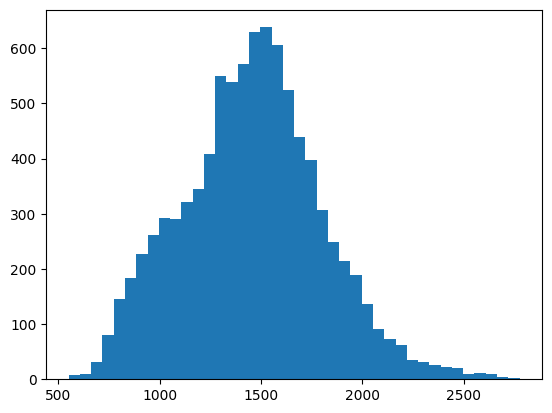

In [14]:
plt.hist(aq_cleaned_relevant_data['PT08.S4(NO2)'],bins=40)

Histogram of Sensor Measurement of Ozone Concentration

(array([ 17.,  64., 135., 198., 280., 343., 380., 401., 490., 535., 595.,
        568., 552., 514., 463., 403., 368., 352., 299., 275., 287., 234.,
        208., 179., 181., 135., 103., 102.,  67.,  65.,  45.,  52.,  28.,
         17.,  23.,   6.,   9.,   5.,   6.,   7.]),
 array([ 221.  ,  278.55,  336.1 ,  393.65,  451.2 ,  508.75,  566.3 ,
         623.85,  681.4 ,  738.95,  796.5 ,  854.05,  911.6 ,  969.15,
        1026.7 , 1084.25, 1141.8 , 1199.35, 1256.9 , 1314.45, 1372.  ,
        1429.55, 1487.1 , 1544.65, 1602.2 , 1659.75, 1717.3 , 1774.85,
        1832.4 , 1889.95, 1947.5 , 2005.05, 2062.6 , 2120.15, 2177.7 ,
        2235.25, 2292.8 , 2350.35, 2407.9 , 2465.45, 2523.  ]),
 <BarContainer object of 40 artists>)

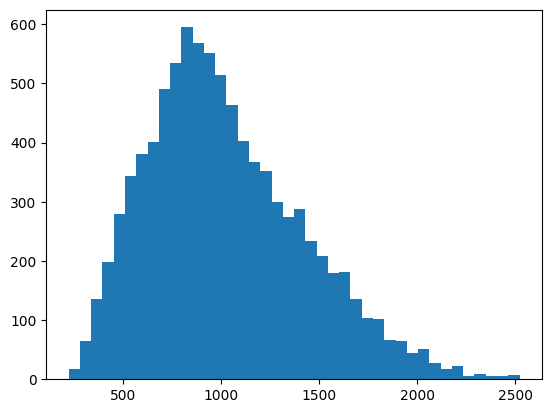

In [15]:
plt.hist(aq_cleaned_relevant_data['PT08.S5(O3)'],bins=40)

Histogram for Temperature (measured in Celsius)

(array([  6.,  14.,  38.,  59., 177., 245., 228., 251., 276., 316., 340.,
        403., 436., 462., 465., 454., 370., 363., 405., 473., 393., 334.,
        374., 370., 285., 253., 180., 163., 138., 116., 117., 116.,  93.,
         93.,  66.,  58.,  33.,  18.,   8.,   2.]),
 array([-1.9   , -0.7375,  0.425 ,  1.5875,  2.75  ,  3.9125,  5.075 ,
         6.2375,  7.4   ,  8.5625,  9.725 , 10.8875, 12.05  , 13.2125,
        14.375 , 15.5375, 16.7   , 17.8625, 19.025 , 20.1875, 21.35  ,
        22.5125, 23.675 , 24.8375, 26.    , 27.1625, 28.325 , 29.4875,
        30.65  , 31.8125, 32.975 , 34.1375, 35.3   , 36.4625, 37.625 ,
        38.7875, 39.95  , 41.1125, 42.275 , 43.4375, 44.6   ]),
 <BarContainer object of 40 artists>)

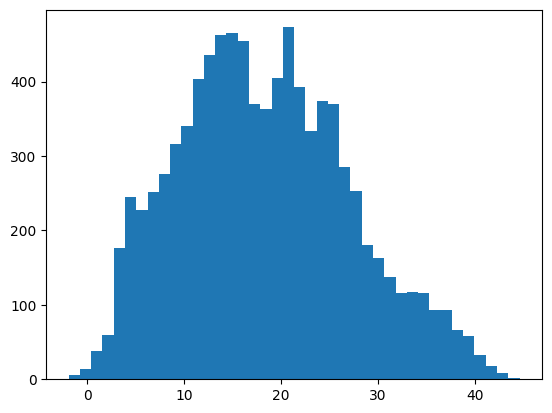

In [16]:
plt.hist(aq_cleaned_relevant_data['T'],bins=40)

Histogram for Relative Humidity (as a percentage)

(array([ 14.,  22.,  73., 102., 131., 183., 162., 191., 200., 255., 253.,
        242., 303., 294., 292., 268., 317., 346., 360., 373., 402., 341.,
        347., 334., 345., 323., 324., 323., 297., 260., 248., 180., 171.,
        181., 160., 154., 117.,  79.,  20.,   4.]),
 array([ 9.2   , 11.1875, 13.175 , 15.1625, 17.15  , 19.1375, 21.125 ,
        23.1125, 25.1   , 27.0875, 29.075 , 31.0625, 33.05  , 35.0375,
        37.025 , 39.0125, 41.    , 42.9875, 44.975 , 46.9625, 48.95  ,
        50.9375, 52.925 , 54.9125, 56.9   , 58.8875, 60.875 , 62.8625,
        64.85  , 66.8375, 68.825 , 70.8125, 72.8   , 74.7875, 76.775 ,
        78.7625, 80.75  , 82.7375, 84.725 , 86.7125, 88.7   ]),
 <BarContainer object of 40 artists>)

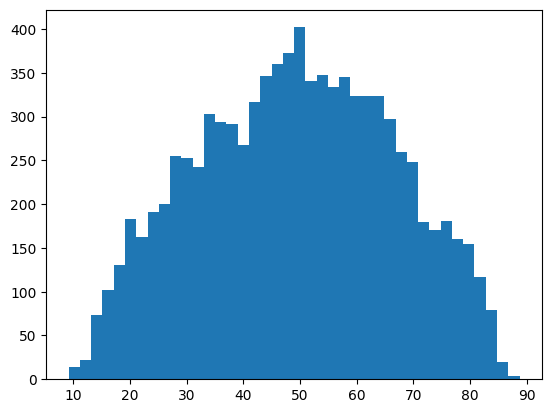

In [17]:
plt.hist(aq_cleaned_relevant_data['RH'],bins=40)

Histogram for Absolute Humidity

(array([ 24.,  68., 104., 189., 330., 289., 229., 214., 274., 278., 350.,
        383., 400., 397., 536., 509., 484., 423., 376., 316., 249., 303.,
        277., 252., 244., 257., 240., 235., 155., 135., 134.,  88.,  69.,
         61.,  40.,  34.,  18.,  21.,   4.,   2.]),
 array([0.1847   , 0.2358575, 0.287015 , 0.3381725, 0.38933  , 0.4404875,
        0.491645 , 0.5428025, 0.59396  , 0.6451175, 0.696275 , 0.7474325,
        0.79859  , 0.8497475, 0.900905 , 0.9520625, 1.00322  , 1.0543775,
        1.105535 , 1.1566925, 1.20785  , 1.2590075, 1.310165 , 1.3613225,
        1.41248  , 1.4636375, 1.514795 , 1.5659525, 1.61711  , 1.6682675,
        1.719425 , 1.7705825, 1.82174  , 1.8728975, 1.924055 , 1.9752125,
        2.02637  , 2.0775275, 2.128685 , 2.1798425, 2.231    ]),
 <BarContainer object of 40 artists>)

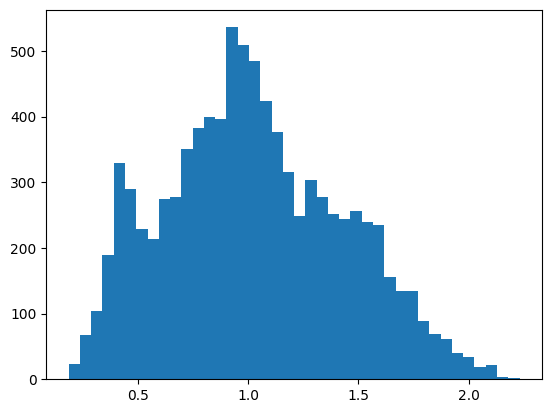

In [18]:
plt.hist(aq_cleaned_relevant_data['AH'],bins=40)

As a refresher, here's a brief collection of summary statistics for each of the variables of interest.

In [19]:
aq_cleaned_relevant_data.agg(["mean","median","max","min","std"])

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
mean,1099.833166,10.083105,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.025530
median,1063.000000,8.200000,909.000000,806.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
max,2040.000000,63.700000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000
min,647.000000,0.100000,383.000000,322.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
std,217.080037,7.449820,266.831429,256.817320,346.206794,398.484288,8.832116,17.316892,0.403813


Scatterplot of Linear Relationship Between Benzene Concentration and Temperature

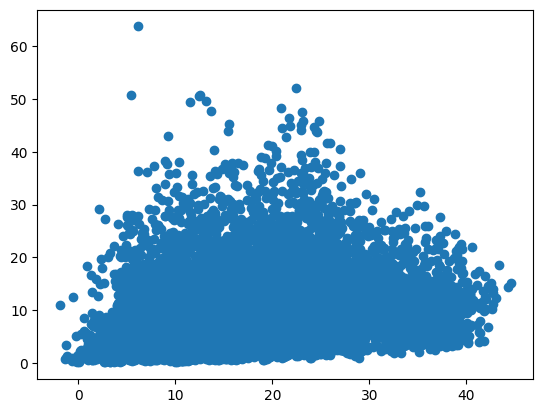

In [20]:
plt.scatter(x="T",y="C6H6(GT)",data=aq_cleaned_relevant_data)

Scatterplot of Linear Relationship Between Benzene Concentration and Relative Humidity

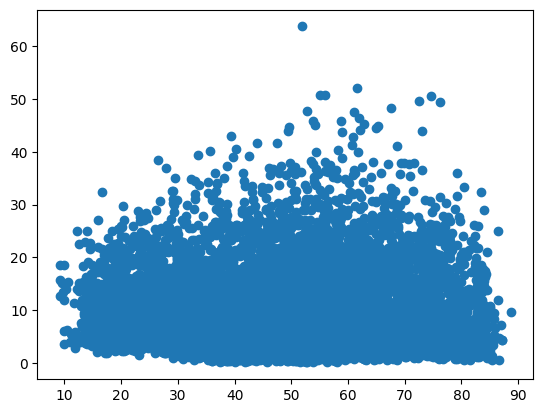

In [21]:
plt.scatter(x="RH",y="C6H6(GT)",data=aq_cleaned_relevant_data)

Scatterplot of Linear Relationship Between Benzene Concentration and Absolute Humidity

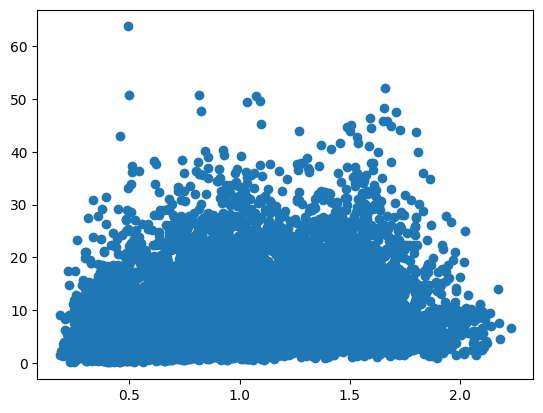

In [22]:
plt.scatter(x="AH",y="C6H6(GT)",data=aq_cleaned_relevant_data)

Scatterplot of Linear Relationship Between Benzene Concentration and Sensor Measurement of Carbon Monoxide

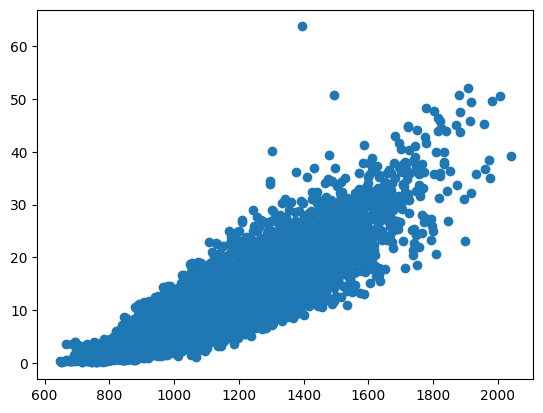

In [23]:
plt.scatter(x="PT08.S1(CO)",y="C6H6(GT)",data=aq_cleaned_relevant_data)

Scatterplot of Linear Relationship Between Benzene Concentration and Sensor Measurement of Non-Metanic Hydrocarbons

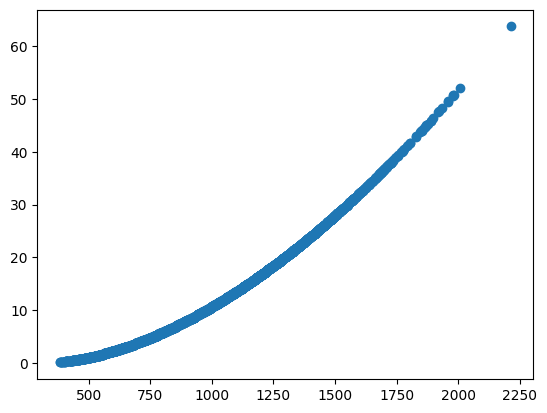

In [24]:
plt.scatter(x="PT08.S2(NMHC)",y="C6H6(GT)",data=aq_cleaned_relevant_data)

Scatterplot of Linear Relationship Between Benzene Concentration and Sensor Measurement of Both Nitrogen Oxides

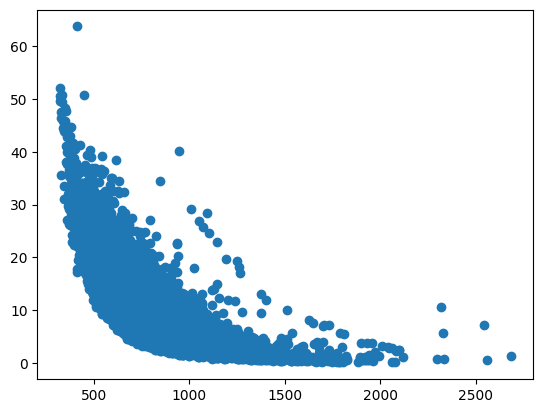

In [25]:
plt.scatter(x="PT08.S3(NOx)",y="C6H6(GT)",data=aq_cleaned_relevant_data)

Scatterplot of Linear Relationship Between Benzene Concentration and Sensor Measurement of Nitrogen Dioxide

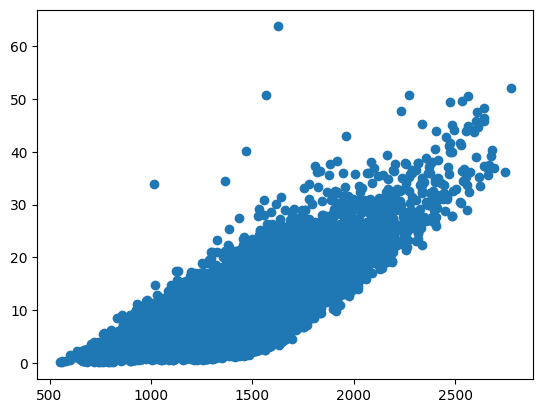

In [26]:
plt.scatter(x="PT08.S4(NO2)",y="C6H6(GT)",data=aq_cleaned_relevant_data)

Scatterplot of Linear Relationship Between Benzene Concentration and Sensor Measurement of Ozone

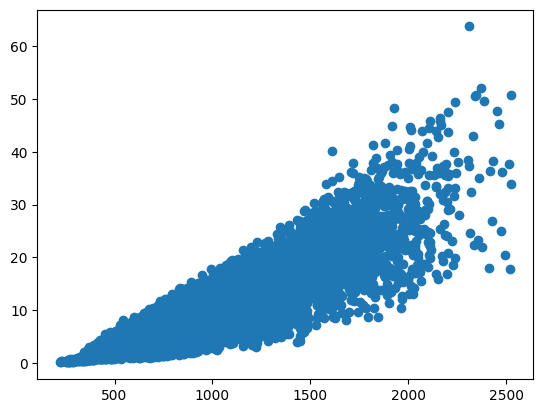

In [27]:
plt.scatter(x="PT08.S5(O3)",y="C6H6(GT)",data=aq_cleaned_relevant_data)

Although a scatterplot matrix may be considered, it would incredibly difficult to decipher any patterns with the number of variables we have.

Instead, we'll use a covariance matrix to see if any variables not related to the true benzene concentration have any linear relationships, which could indicate issues for multicollinearity.

In [28]:
aq_cleaned_relevant_data.cov()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
PT08.S1(CO),47123.742575,1429.279706,51723.869640,-43035.502736,51321.655828,77794.168208,93.230917,430.820323,11.862434
C6H6(GT),1429.279706,55.499814,1951.966040,-1407.657088,1974.957619,2569.914142,13.090831,-7.957299,0.505315
PT08.S2(NMHC),51723.869640,1951.966040,71199.011290,-54595.638897,71801.875653,93630.186924,568.840624,-417.618383,20.142007
PT08.S3(NOx),-43035.502736,-1407.657088,-54595.638897,65955.135860,-47876.202479,-81519.029410,-329.149791,-252.336361,-24.061584
PT08.S4(NO2),51321.655828,1974.957619,71801.875653,-47876.202479,119859.143884,81553.023061,1716.215872,-192.975391,88.025523
PT08.S5(O3),77794.168208,2569.914142,93630.186924,-81519.029410,81553.023061,158789.727561,-95.631174,862.262777,11.384824
T,93.230917,13.090831,568.840624,-329.149791,1716.215872,-95.631174,78.006268,-88.497047,2.341053
RH,430.820323,-7.957299,-417.618383,-252.336361,-192.975391,862.262777,-88.497047,299.874765,1.174584
AH,11.862434,0.505315,20.142007,-24.061584,88.025523,11.384824,2.341053,1.174584,0.163065


Wow, those numbers are huge! Let's use a correlation matrix instead.

In [29]:
aq_cleaned_relevant_data.corr()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
PT08.S1(CO),1.000000,0.883795,0.892964,-0.771938,0.682881,0.899324,0.048627,0.114606,0.135324
C6H6(GT),0.883795,1.000000,0.981950,-0.735744,0.765731,0.865689,0.198956,-0.061681,0.167972
PT08.S2(NMHC),0.892964,0.981950,1.000000,-0.796703,0.777254,0.880578,0.241373,-0.090380,0.186933
PT08.S3(NOx),-0.771938,-0.735744,-0.796703,1.000000,-0.538468,-0.796569,-0.145112,-0.056740,-0.232017
PT08.S4(NO2),0.682881,0.765731,0.777254,-0.538468,1.000000,0.591144,0.561270,-0.032188,0.629641
PT08.S5(O3),0.899324,0.865689,0.880578,-0.796569,0.591144,1.000000,-0.027172,0.124956,0.070751
T,0.048627,0.198956,0.241373,-0.145112,0.561270,-0.027172,1.000000,-0.578621,0.656397
RH,0.114606,-0.061681,-0.090380,-0.056740,-0.032188,0.124956,-0.578621,1.000000,0.167971
AH,0.135324,0.167972,0.186933,-0.232017,0.629641,0.070751,0.656397,0.167971,1.000000


Since the variables related to date and time aren't formatted properly, we'll need to make a few adjustments and define a couple of variables for the month, year, and the time of day. We'll go back to the cleaned data set to do so.

In [30]:
aq_cleaned_data["Date_TS"]=aq_cleaned_data.Date.astype('datetime64[ns]')
aq_cleaned_data["Time_TS"]=aq_cleaned_data.Time.astype('timedelta64[ns]')
aq_cleaned_data["Month_TS"]=aq_cleaned_data.Date_TS.astype('period[M]')
aq_cleaned_data["Year_TS"]=aq_cleaned_data.Date_TS.astype('period[Y]')
aq_cleaned_data["Time_of_Day"]=pd.cut(aq_cleaned_data.Time_TS,3,labels=["Early","Mid","Late"])

/tmp/ipython-input-693501317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq_cleaned_data["Date_TS"]=aq_cleaned_data.Date.astype('datetime64[ns]')
/tmp/ipython-input-693501317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq_cleaned_data["Time_TS"]=aq_cleaned_data.Time.astype('timedelta64[ns]')
/tmp/ipython-input-693501317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

As before, we'll drop the variables that we don't need.

In [31]:
aq_cleaned_relevant_TS_data=aq_cleaned_data.drop(['Date','Time','CO(GT)','NMHC(GT)','NOx(GT)','NO2(GT)'],axis=1)
aq_cleaned_relevant_TS_data

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_TS,Time_TS,Month_TS,Year_TS,Time_of_Day
0,1360,11.9,1046,1056,1692,1268,13.6,48.9,0.7578,2004-03-10,0 days 18:00:00,2004-03,2004,Late
1,1292,9.4,955,1174,1559,972,13.3,47.7,0.7255,2004-03-10,0 days 19:00:00,2004-03,2004,Late
2,1402,9.0,939,1140,1555,1074,11.9,54.0,0.7502,2004-03-10,0 days 20:00:00,2004-03,2004,Late
3,1376,9.2,948,1092,1584,1203,11.0,60.0,0.7867,2004-03-10,0 days 21:00:00,2004-03,2004,Late
4,1272,6.5,836,1205,1490,1110,11.2,59.6,0.7888,2004-03-10,0 days 22:00:00,2004-03,2004,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,1314,13.5,1101,539,1374,1729,21.9,29.3,0.7568,2005-04-04,0 days 10:00:00,2005-04,2005,Mid
9353,1163,11.4,1027,604,1264,1269,24.3,23.7,0.7119,2005-04-04,0 days 11:00:00,2005-04,2005,Mid
9354,1142,12.4,1063,603,1241,1092,26.9,18.3,0.6406,2005-04-04,0 days 12:00:00,2005-04,2005,Mid
9355,1003,9.5,961,702,1041,770,28.3,13.5,0.5139,2005-04-04,0 days 13:00:00,2005-04,2005,Mid


Here's what would happen if we were to take the average benzene concentration and partition it by date.

In [32]:
aq_cleaned_relevant_TS_data.groupby('Date_TS')['C6H6(GT)'].mean()

,C6H6(GT)
Date_TS,
2004-03-10,8.450000
2004-03-11,7.979167
2004-03-12,12.129167
2004-03-13,10.916667
2004-03-14,9.637500
...,...
2005-03-31,5.220833
2005-04-01,3.412500
2005-04-02,2.529167


For something slightly better, we'll take the hour of day into account.

In [33]:
aq_cleaned_relevant_TS_data.groupby('Time_TS')['C6H6(GT)'].mean()

,C6H6(GT)
Time_TS,
0 days 00:00:00,7.684140
0 days 01:00:00,5.991711
0 days 02:00:00,4.379467
0 days 03:00:00,3.379255
0 days 04:00:00,2.916711
0 days 05:00:00,3.068435
0 days 06:00:00,4.756117
0 days 07:00:00,10.398936
0 days 08:00:00,15.894149


And now, the average benzene concentration grouped by month (and year).

In [34]:
aq_cleaned_relevant_TS_data.groupby('Month_TS')['C6H6(GT)'].mean()

,C6H6(GT)
Month_TS,
2004-03,9.932745
2004-04,10.389177
2004-05,10.219041
2004-06,10.595748
2004-07,10.599462
2004-08,6.993669
2004-09,11.554558
2004-10,13.525303
2004-11,12.511806


Earlier, a variable was created to denote the time of day. Let's utilize it.

In [35]:
aq_cleaned_relevant_TS_data.groupby('Time_of_Day')['C6H6(GT)'].mean()

/tmp/ipython-input-1421245297.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aq_cleaned_relevant_TS_data.groupby('Time_of_Day')['C6H6(GT)'].mean()


,C6H6(GT)
Time_of_Day,
Early,5.317016
Mid,12.040844
Late,12.910138


Here's the average benzene concentration done by the time of day and month.

In [36]:
aq_cleaned_relevant_TS_data.groupby(['Month_TS','Time_of_Day'])['C6H6(GT)'].mean()

/tmp/ipython-input-1160223653.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aq_cleaned_relevant_TS_data.groupby(['Month_TS','Time_of_Day'])['C6H6(GT)'].mean()


Month_TS  Time_of_Day
2004-03   Early           4.130952
          Mid            12.741667
          Late           12.822414
2004-04   Early           5.429741
          Mid            12.485217
          Late           13.283117
2004-05   Early           5.992917
          Mid            12.226316
          Late           12.352675
2004-06   Early           6.124123
          Mid            12.269565
          Late           13.428571
2004-07   Early           6.939271
          Mid            12.043548
          Late           12.800806
2004-08   Early           4.972340
          Mid             8.190948
          Late            7.858772
2004-09   Early           6.292241
          Mid            13.948927
          Late           14.351899
2004-10   Early           6.968548
          Mid            16.171660
          Late           17.446371
2004-11   Early           5.329167
          Mid            15.233333
          Late           16.972917
2004-12   Early           4.609821
          Mid            11.373661
          Late           12.624537
2005-01   Early           4.227074
          Mid            10.840086
          Late           12.076126
2005-02   Early           4.209000
          Mid             8.797500
          Late            9.536735
2005-03   Early           3.647984
          Mid            10.466397
          Late           12.081855
2005-04   Early           2.565625
          Mid             5.867742
          Late            4.533333
Name: C6H6(GT), dtype: float64

And just for fun, here's the average benzene concentrations done by year, even though portions of both years were used.

In [37]:
aq_cleaned_relevant_TS_data.groupby('Year_TS')['C6H6(GT)'].mean()

,C6H6(GT)
Year_TS,
2004,10.631197
2005,8.294595
